In [1]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

In [2]:
df = pd.read_csv('../data/processed/central_Africa_hospitals.csv')
df

Unnamed: 0 Country Admin1                      Facility name  \
0               0  Angola  Bengo            Hospital Barra Do Dande   
1               1  Angola  Bengo                Hospital Dos Dembos   
2               2  Angola  Bengo       Hospital Municipal de Ambriz   
3               3  Angola  Bengo  Hospital Municipal de Bula Atumba   
4               4  Angola  Bengo        Hospital Municipal de Dande   
...           ...     ...    ...                                ...   
22881       76057  Rwanda   West             Rwankeri Health Centre   
22882       76058  Rwanda   West             Rwinzuki Health Centre   
22883       76059  Rwanda   West           Shyira District Hospital   
22884       76060  Rwanda   West               Shyira Health Centre   
22885       76061  Rwanda   West                 Yove Health Centre   

            Facility type Ownership     Lat     Long     LL source  
0                Hospital     Govt. -8.6560  13.4919  Google Earth  
1                Hospital     Govt. -8.5026  14.5862  Google Earth  
2      Municipal Hospital     Govt. -7.8522  13.1307  Google Earth  
3      Municipal Hospital     Govt. -8.6742  14.7925  Google Earth  
4      Municipal Hospital     Govt. -8.5835  13.6569  Google Earth  
...                   ...       ...     ...      ...           ...  
22881       Health Centre    Public -1.5860  29.5344           GPS  
22882       Health Centre    Public -2.6383  28.9348      Geonames  
22883   District Hospital    Public -1.6820  29.6291           GPS  
22884       Health Centre    Public -1.6790  29.5208           GPS  
22885       Health Centre    Public -2.4066  29.1992           GPS  

[22886 rows x 9 columns]

In [3]:
df['Facility type'].unique()

array(['Hospital', 'Municipal Hospital', 'Provincial Hospital',
       'Posto de Saúde', 'Centro de Saúde', 'Centro Materno Infantil',
       'Central Hospital', 'Centro Sanatorio Materno Infantil',
       'Regional Hospital', 'General Hospital', 'Hôpital de District',
       'Health Centre', 'Hôpital Tertiaire', 'Centre de Santé Intégré',
       'Centre Medical d’Arrondissement', 'Hôpital Régional',
       'Dispensaire', 'Hôpital Centraux', 'Hôpital Général', 'Clinic',
       'Centre de Santé "C"', 'Centre de Santé "E"',
       'Centre de Santé "B"', 'Centre de Santé "A"', 'Poste de santé',
       'Centre de Sante', 'Hôpital Régional Universitaire',
       'Hôpital Préfectoraux', 'Centre de Santé "D"',
       'Hôpital de Regional', 'Hôpital de Nationaux', 'Regional hospital',
       'Poste de Santé', 'Centre de Santé',
       'Hôpital Général de Référence', 'Centre Médical', 'Centre Hôpital',
       'Centre de Santé de Référence', 'Polyclinique', 'Clinique',
       'Centre de Santé Mu

In [4]:
df['Ownership'].unique()

array(['Govt.', 'MoH', 'FBO', 'Public', 'Privé à but non lucratif', nan,
       'Publique', 'Confessionnel', 'ONG/non-lucratif', 'CBO',
       'Private not for profit'], dtype=object)

In [5]:
df['Facility type'].unique()

array(['Hospital', 'Municipal Hospital', 'Provincial Hospital',
       'Posto de Saúde', 'Centro de Saúde', 'Centro Materno Infantil',
       'Central Hospital', 'Centro Sanatorio Materno Infantil',
       'Regional Hospital', 'General Hospital', 'Hôpital de District',
       'Health Centre', 'Hôpital Tertiaire', 'Centre de Santé Intégré',
       'Centre Medical d’Arrondissement', 'Hôpital Régional',
       'Dispensaire', 'Hôpital Centraux', 'Hôpital Général', 'Clinic',
       'Centre de Santé "C"', 'Centre de Santé "E"',
       'Centre de Santé "B"', 'Centre de Santé "A"', 'Poste de santé',
       'Centre de Sante', 'Hôpital Régional Universitaire',
       'Hôpital Préfectoraux', 'Centre de Santé "D"',
       'Hôpital de Regional', 'Hôpital de Nationaux', 'Regional hospital',
       'Poste de Santé', 'Centre de Santé',
       'Hôpital Général de Référence', 'Centre Médical', 'Centre Hôpital',
       'Centre de Santé de Référence', 'Polyclinique', 'Clinique',
       'Centre de Santé Mu

In [6]:
df.groupby('Country')['Ownership'].unique()

Country
Angola                                                                  [Govt., MoH]
Burundi                                                                [FBO, Public]
Cameroon                                                                       [MoH]
Central African Republic                     [Privé à but non lucratif, Public, nan]
Chad                                                                           [MoH]
Democratic Republic of the Congo    [Publique, Confessionnel, ONG/non-lucratif, CBO]
Equatorial Guinea                                                              [nan]
Gabon                                   [Public, Private not for profit, Govt., FBO]
Rwanda                                                                 [Public, CBO]
Name: Ownership, dtype: object

In [7]:
# MoH: Ministry of Health
# Faith-based organizations (FBOs)
# Community Based Organizations (CBOs)

In [8]:
df.groupby('Country')['Ownership'].unique()

Country
Angola                                                                  [Govt., MoH]
Burundi                                                                [FBO, Public]
Cameroon                                                                       [MoH]
Central African Republic                     [Privé à but non lucratif, Public, nan]
Chad                                                                           [MoH]
Democratic Republic of the Congo    [Publique, Confessionnel, ONG/non-lucratif, CBO]
Equatorial Guinea                                                              [nan]
Gabon                                   [Public, Private not for profit, Govt., FBO]
Rwanda                                                                 [Public, CBO]
Name: Ownership, dtype: object

In [9]:
df['Ownership'] = df['Ownership'].replace(['Publique'],'Public')
df['Ownership'] = df['Ownership'].replace(['Privé à but non lucratif'],'Private not for profit')

In [10]:
df['Ownership'].unique()

array(['Govt.', 'MoH', 'FBO', 'Public', 'Private not for profit', nan,
       'Confessionnel', 'ONG/non-lucratif', 'CBO'], dtype=object)

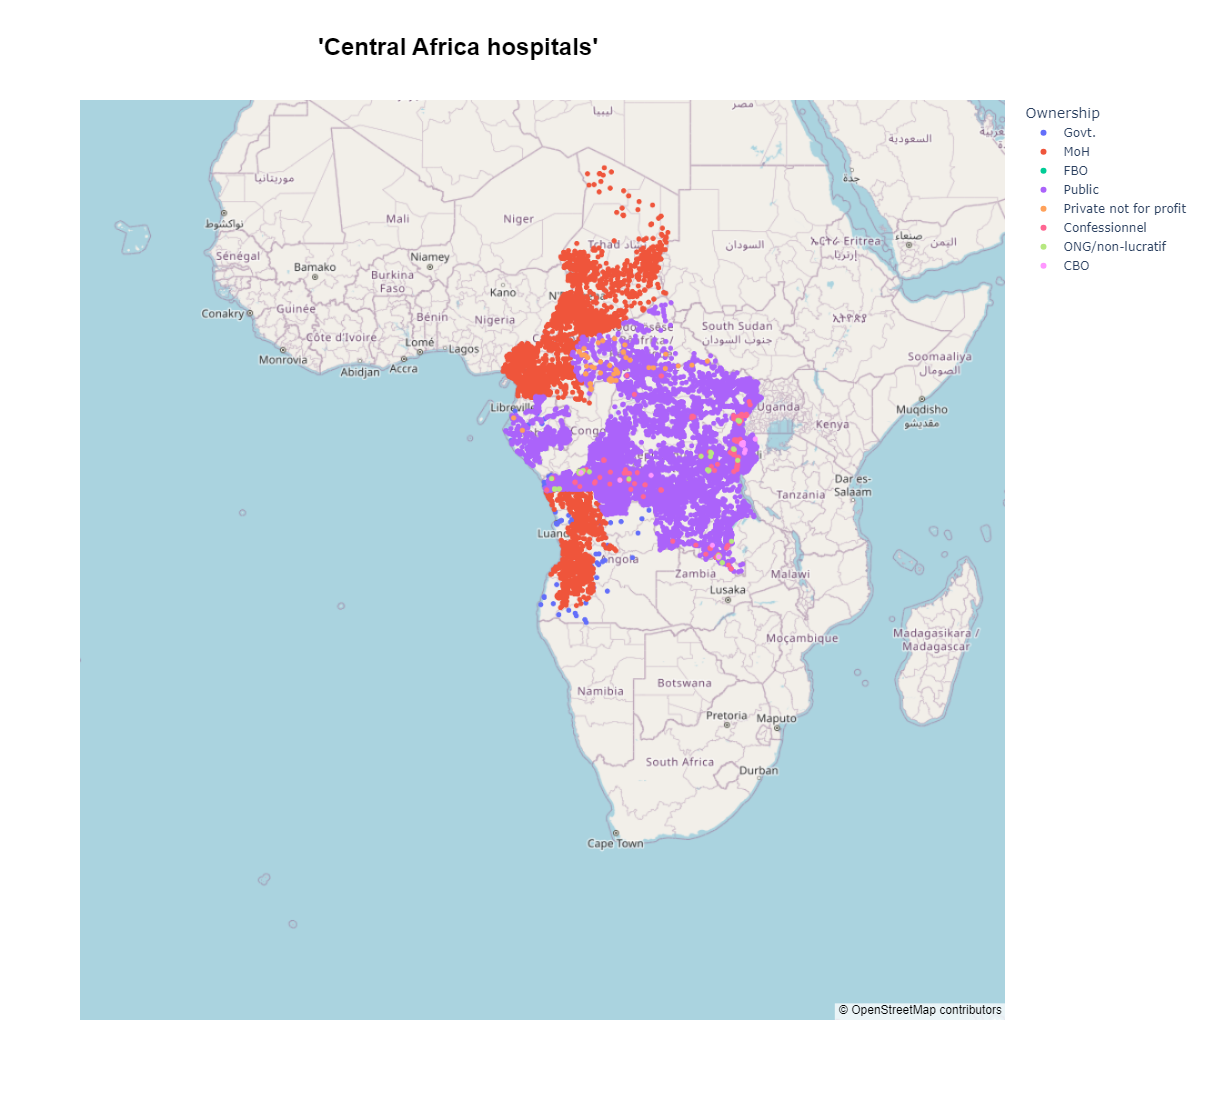

In [15]:
fig = px.scatter_mapbox(df,
                        lat='Lat',
                        lon='Long',
                        color='Ownership',
                        hover_name='Facility name',
                        hover_data=['Country', 'Facility type',],
                        zoom=1.5,
                        title="<b>'Central Africa hospitals'</b>",
                        color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(
                    title={"font_size":20,
                         "xanchor":"center", "x":0.38,
                        "yanchor":"bottom", "y":0.95},
                    title_font=dict(size=24, color='Black', family='Arial, sans-serif'),
                    height=1100,
                    width=1300,
                    autosize=True,
                    hovermode='closest',
                  #  mapbox=dict(
                   #     style='open-street-map'
                  #  ),
    mapbox=dict(
        style='open-street-map',
        center=dict(lat=-12, lon=12),  # Centered on Africa
        zoom=3  # Adjust zoom level as needed
    ),
                    legend_title_text='Ownership')

fig.show()